In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

3.3 Data Research

In [3]:
# 导入租房数据
df_zu_shibo = pd.read_csv('df_zu_shibo.csv')
df_zu_gumei = pd.read_csv('df_zu_gumei.csv')
df_zu_xujiahui = pd.read_csv('df_zu_xujiahui.csv')
df_zu_zhangjiang = pd.read_csv('df_zu_zhangjiang.csv')
df_zu = pd.read_csv('data_zu.csv')

# 计算每平方米租金
df_zu_shibo['每平方米租金'] = df_zu_shibo['价格'] / df_zu_shibo['面积']
df_zu_gumei['每平方米租金'] = df_zu_gumei['价格'] / df_zu_gumei['面积']
df_zu_xujiahui['每平方米租金'] = df_zu_xujiahui['价格'] / df_zu_xujiahui['面积']
df_zu_zhangjiang['每平方米租金'] = df_zu_zhangjiang['价格'] / df_zu_zhangjiang['面积']
df_zu['每平方米租金'] = df_zu['价格'] / df_zu['面积']


# 摘取租房数据中需要的部分
df_zu_shibo_need = df_zu_shibo[['每平方米租金','面积','二级地址']]
df_zu_gumei_need = df_zu_gumei[['每平方米租金','面积','二级地址']]
df_zu_xujiahui_need = df_zu_xujiahui[['每平方米租金','面积','二级地址']]
df_zu_zhangjiang_need = df_zu_zhangjiang[['每平方米租金','面积','二级地址']]
df_zu_need = df_zu[['每平方米租金','面积','二级地址']]

df_zu_need

,每平方米租金,面积,二级地址
0,113.513514,37.0,世博
1,107.692308,39.0,世博
2,111.250000,40.0,世博
3,102.564103,39.0,世博
4,105.263158,38.0,世博
...,...,...,...
4125,148.387097,31.0,徐家汇
4126,57.407407,54.0,徐家汇
4127,109.375000,64.0,徐家汇
4128,139.344262,61.0,徐家汇


In [4]:
# 导入二手房数据
df_esf_shibo = pd.read_csv('df_esf_shibo.csv')
df_esf_gumei = pd.read_csv('df_esf_gumei.csv')
df_esf_zhangjiang = pd.read_csv('df_esf_zhangjiang.csv')
df_esf_xujiahui = pd.read_csv('df_esf_xujiahui.csv')
df_esf = pd.read_csv('data_esf.csv')

# 摘取二手房数据中需要的部分
df_esf_shibo_need = df_esf_shibo[['每平方米价格','面积','路段']]
df_esf_gumei_need = df_esf_gumei[['每平方米价格','面积','路段']]
df_esf_xujiahui_need = df_esf_xujiahui[['每平方米价格','面积','路段']]
df_esf_zhangjiang_need = df_esf_zhangjiang[['每平方米价格','面积','路段']]
df_esf_need = df_esf[['每平方米价格','面积','路段']]

df_esf_need

,每平方米价格,面积,路段
0,68095,126.00,世博
1,68106,132.00,世博
2,55033,149.00,世博
3,41777,45.00,世博
4,45034,57.29,世博
...,...,...,...
4103,47226,96.98,徐家汇
4104,80321,47.31,徐家汇
4105,90544,124.80,徐家汇
4106,99868,38.05,徐家汇


In [5]:
# 对租房数据进行描述性统计
df_zu_need.describe()

,每平方米租金,面积
count,4123.000000,4123.000000
mean,100.047915,72.453311
std,33.714721,182.653075
min,1.000000,8.000000
25%,75.609756,38.000000
50%,96.181818,48.000000
75%,120.000000,94.000000
max,270.000000,8000.000000


In [6]:
# 对二手房数据进行描述性统计
df_esf_need.describe()

,每平方米价格,面积
count,4108.000000,4108.000000
mean,71528.669669,105.134998
std,26447.493619,88.254438
min,14057.000000,5.000000
25%,49534.750000,64.890000
50%,68698.000000,92.865000
75%,88442.250000,126.390000
max,481602.000000,2705.000000


In [7]:
# 定义一个进行离群值清洗、并汇报离群值情况的函数
def filter(df_zu_need,numeric_columns,index):   
    df_zu_need_ = df_zu_need.copy()  # 复制数据，避免修改原始数据

    # 存储每个列的上下边界
    bounds = {}

    # 对每列计算分位数和边界
    for col in numeric_columns:
        # 计算第一四分位数(Q1)和第三四分位数(Q3)
        q1 = df_zu_need_[col].quantile(0.25)
        q3 = df_zu_need_[col].quantile(0.75)
        
        # 计算四分位距(IQR)
        iqr = q3 - q1
        
        # 计算上下边界（通常使用1.5倍IQR作为阈值）
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # 保存边界值
        bounds[col] = (lower_bound, upper_bound)
        
        # 打印该列的统计信息
        print(f"{col}的第一四分位数(Q1): {q1:.2f}")
        print(f"{col}的第三四分位数(Q3): {q3:.2f}")
        print(f"{col}的四分位距(IQR): {iqr:.2f}")
        print(f"{col}的正常范围: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("---")

    # 初始化：认为所有行都符合条件
    filter_condition = pd.Series([True] * len(df_zu_need_), index=df_zu_need_.index)

    for col in numeric_columns:
        lower, upper = bounds[col]
        column_condition = (df_zu_need_[col] >= lower) & (df_zu_need_[col] <= upper) # 保留在正常范围内的行
        filter_condition = filter_condition & column_condition # 只有同时满足所有列条件的行才会被保留

    # 得到清洗后的数据
    df_zu_cleaned = df_zu_need_[filter_condition].copy()

    if index == 1: # 当该输入值为1时，汇报结果
        # 打印离群值统计信息
        print(f"\n原始数据总行数: {len(df_zu_need_)}")
        print(f"清洗后数据总行数: {len(df_zu_cleaned)}")
        print(f"移除的离群值数量: {len(df_zu_need_) - len(df_zu_cleaned)}")
        print(f"移除比例: {(len(df_zu_need_) - len(df_zu_cleaned))/len(df_zu_need_):.2%}")

        # 绘制原始数据箱线图
        plt.subplot(2, 1, 1)
        df_zu_need_[numeric_columns].boxplot()
        plt.title('原始数据箱线图')
        plt.ylabel('数值')

        # 绘制清洗后数据箱线图
        plt.subplot(2, 1, 2)
        df_zu_cleaned[numeric_columns].boxplot()
        plt.title('去除离群值后的数据箱线图')
        plt.ylabel('数值')

        # 调整布局
        plt.tight_layout()
        plt.show()

        # 查看离群值具体信息
        outliers = df_zu_need_[~filter_condition] # 逻辑取反找出离群值
        print("\n离群值如下：")
        print(outliers[numeric_columns])

    return df_zu_cleaned


每平方米租金的第一四分位数(Q1): 75.61
每平方米租金的第三四分位数(Q3): 120.00
每平方米租金的四分位距(IQR): 44.39
每平方米租金的正常范围: [9.02, 186.59]
---
面积的第一四分位数(Q1): 38.00
面积的第三四分位数(Q3): 94.00
面积的四分位距(IQR): 56.00
面积的正常范围: [-46.00, 178.00]
---

原始数据总行数: 4130
清洗后数据总行数: 3919
移除的离群值数量: 211
移除比例: 5.11%


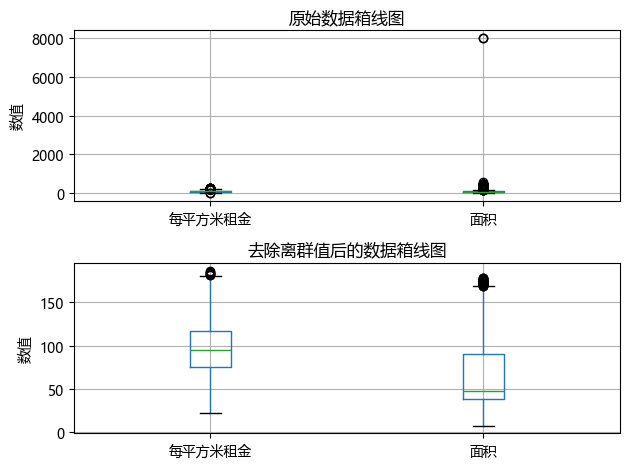


离群值如下：
          每平方米租金     面积
116          NaN    NaN
144   150.000000  200.0
206          NaN    NaN
264          NaN    NaN
364    71.111111  180.0
...          ...    ...
4000  210.526316   38.0
4037  193.750000   16.0
4040  197.142857   35.0
4065   81.364829  381.0
4113  187.500000   96.0

[211 rows x 2 columns]


In [8]:
# 对租房数据进行离群值清洗，并汇报结果
numeric_columns = ['每平方米租金', '面积']
df_zu_cleaned = filter(df_zu_need,numeric_columns,1)

每平方米价格的第一四分位数(Q1): 49534.75
每平方米价格的第三四分位数(Q3): 88442.25
每平方米价格的四分位距(IQR): 38907.50
每平方米价格的正常范围: [-8826.50, 146803.50]
---
面积的第一四分位数(Q1): 64.89
面积的第三四分位数(Q3): 126.39
面积的四分位距(IQR): 61.50
面积的正常范围: [-27.36, 218.64]
---

原始数据总行数: 4108
清洗后数据总行数: 3984
移除的离群值数量: 124
移除比例: 3.02%


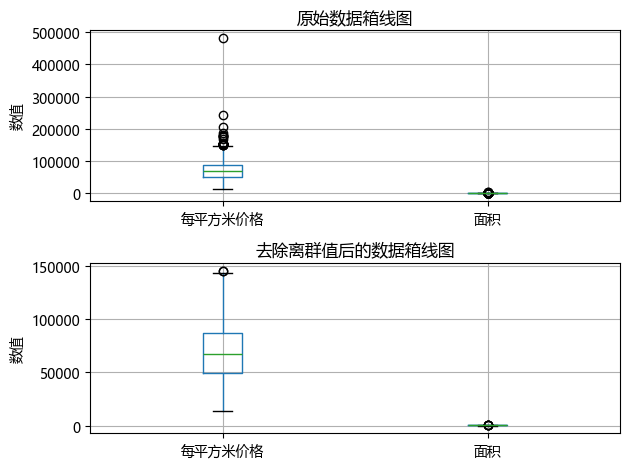


离群值如下：
      每平方米价格      面积
267    64440  248.29
898    76040  248.29
1206  127352  231.64
1222   71923  230.80
1248   76294  220.20
...      ...     ...
3721  108222  264.27
3777  168304  109.92
3867  175294  340.00
3884  124151  346.35
4070  100779  333.40

[124 rows x 2 columns]


In [9]:
# 对二手房数据进行离群值清洗，并汇报结果
numeric_columns = ['每平方米价格', '面积']
df_esf_cleaned = filter(df_esf_need,numeric_columns,1)

每平方米租金的第一四分位数(Q1): 90.00
每平方米租金的第三四分位数(Q3): 115.38
每平方米租金的四分位距(IQR): 25.38
每平方米租金的正常范围: [51.92, 153.46]
---
面积的第一四分位数(Q1): 37.00
面积的第三四分位数(Q3): 58.00
面积的四分位距(IQR): 21.00
面积的正常范围: [5.50, 89.50]
---

原始数据总行数: 1148
清洗后数据总行数: 1030
移除的离群值数量: 118
移除比例: 10.28%


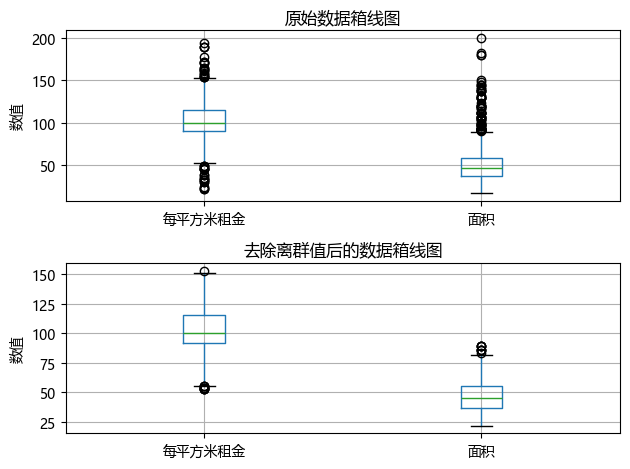


离群值如下：
          每平方米租金     面积
42     49.411765   34.0
48     86.805556  144.0
50     32.584270   89.0
51    105.494505   91.0
116          NaN    NaN
...          ...    ...
1098   72.222222  180.0
1101  108.108108  111.0
1126   88.321168  137.0
1141  102.150538   93.0
1147         NaN    NaN

[118 rows x 2 columns]
每平方米租金的第一四分位数(Q1): 67.39
每平方米租金的第三四分位数(Q3): 90.45
每平方米租金的四分位距(IQR): 23.06
每平方米租金的正常范围: [32.80, 125.04]
---
面积的第一四分位数(Q1): 41.00
面积的第三四分位数(Q3): 116.00
面积的四分位距(IQR): 75.00
面积的正常范围: [-71.50, 228.50]
---
每平方米租金的第一四分位数(Q1): 104.55
每平方米租金的第三四分位数(Q3): 140.35
每平方米租金的四分位距(IQR): 35.81
每平方米租金的正常范围: [50.84, 194.06]
---
面积的第一四分位数(Q1): 52.00
面积的第三四分位数(Q3): 131.00
面积的四分位距(IQR): 79.00
面积的正常范围: [-66.50, 249.50]
---
每平方米租金的第一四分位数(Q1): 63.19
每平方米租金的第三四分位数(Q3): 90.00
每平方米租金的四分位距(IQR): 26.81
每平方米租金的正常范围: [22.98, 130.21]
---
面积的第一四分位数(Q1): 20.00
面积的第三四分位数(Q3): 50.00
面积的四分位距(IQR): 30.00
面积的正常范围: [-25.00, 95.00]
---
每平方米价格的第一四分位数(Q1): 46979.00
每平方米价格的第三四分位数(Q3): 72645.00
每平方米价格的四分位距(IQR): 25666.

In [10]:
# 对所有block的租房、买房数据进行离群值清洗
# 为节约空间，仅展示世博区域租房的清洗结果

numeric_columns = ['每平方米租金', '面积']
df_zu_shibo_cleaned = filter(df_zu_shibo_need,numeric_columns,1)

df_zu_gumei_cleaned = filter(df_zu_gumei_need,numeric_columns,0)
df_zu_xujiahui_cleaned = filter(df_zu_xujiahui_need,numeric_columns,0)
df_zu_zhangjiang_cleaned = filter(df_zu_zhangjiang_need,numeric_columns,0)

numeric_columns = ['每平方米价格', '面积']
df_esf_shibo_cleaned = filter(df_esf_shibo_need,numeric_columns,0)
df_esf_gumei_cleaned = filter(df_esf_gumei_need,numeric_columns,0)
df_esf_xujiahui_cleaned = filter(df_esf_xujiahui_need,numeric_columns,0)
df_esf_zhangjiang_cleaned = filter(df_esf_zhangjiang_need,numeric_columns,0)

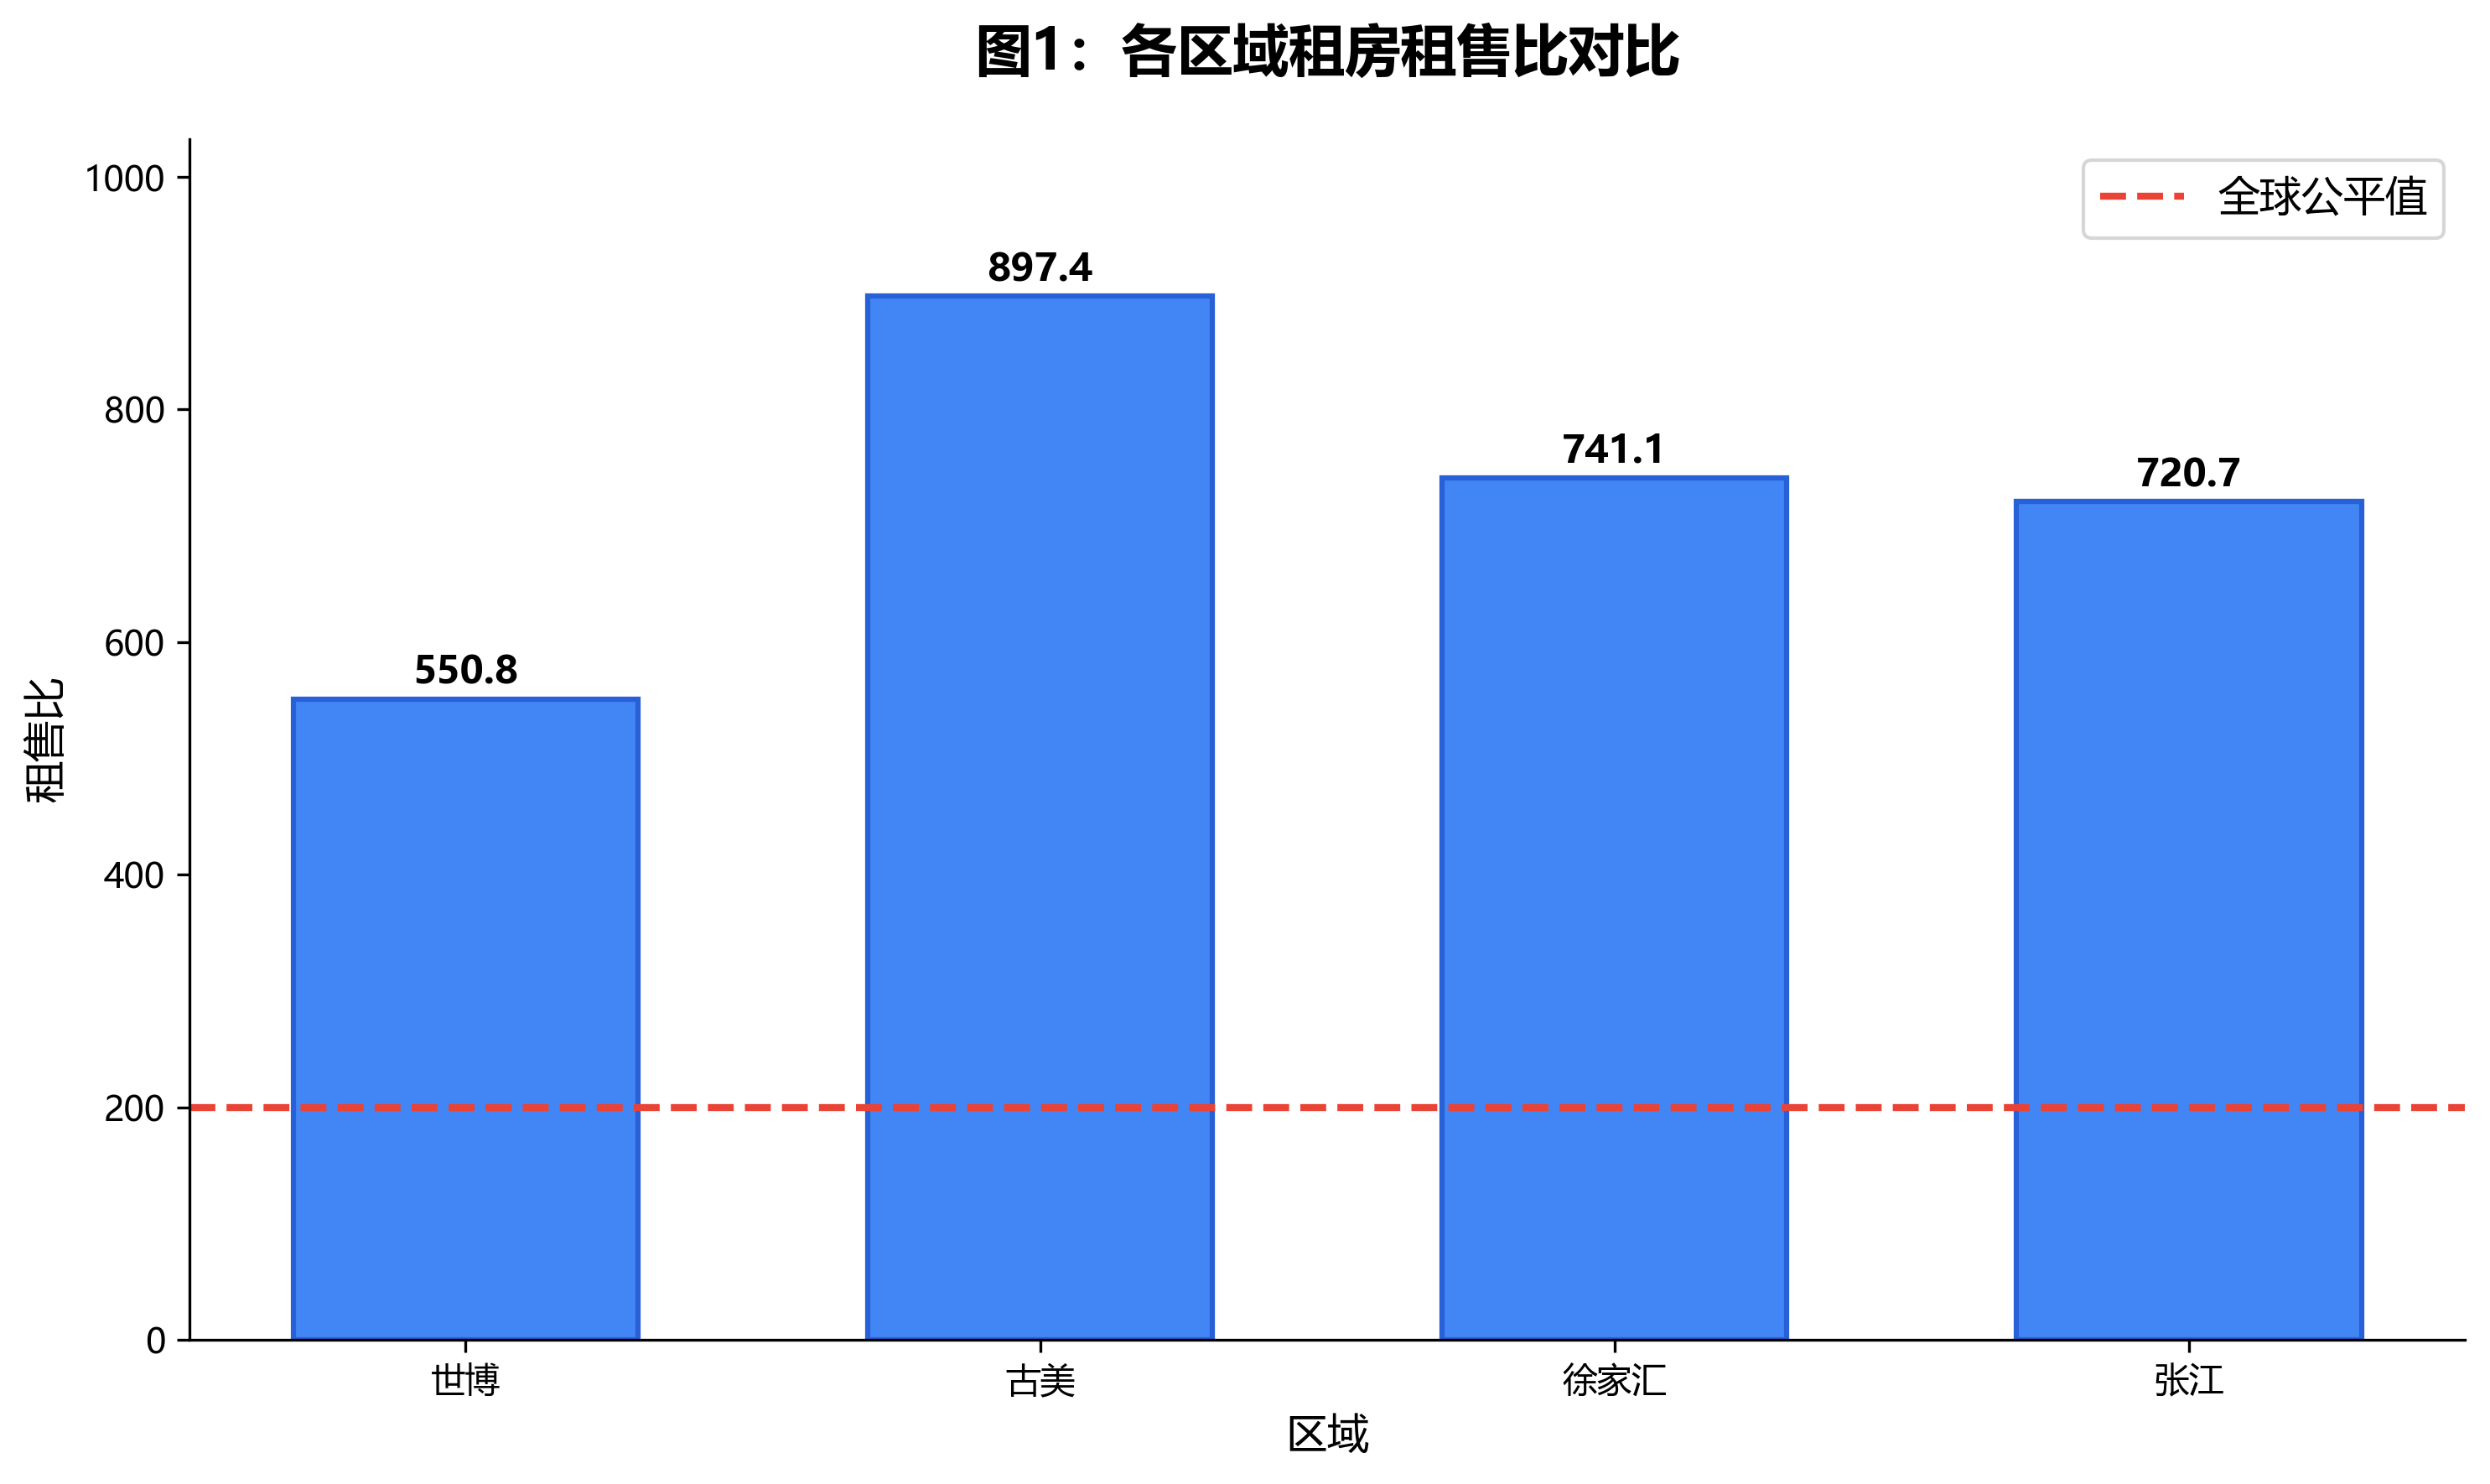

In [11]:
price_to_rent_shibo = (df_esf_shibo_cleaned['每平方米价格'] / df_zu_shibo_cleaned['每平方米租金']).median()
price_to_rent_gumei = (df_esf_gumei_cleaned['每平方米价格'] / df_zu_gumei_cleaned['每平方米租金']).median()
price_to_rent_xujiahui = (df_esf_xujiahui_cleaned['每平方米价格'] / df_zu_xujiahui_cleaned['每平方米租金']).median()
price_to_rent_zhangjiang = (df_esf_zhangjiang_cleaned['每平方米价格'] / df_zu_zhangjiang_cleaned['每平方米租金']).median()
price_to_rent = [price_to_rent_shibo,price_to_rent_gumei,price_to_rent_xujiahui,price_to_rent_zhangjiang]


plt.figure(figsize=(10, 6), dpi=300)
areas = ["世博", "古美", "徐家汇", "张江"]

bars = plt.bar(
    x=areas, 
    height=price_to_rent,
    color="#4285F4",  # 柱子颜色
    width=0.6,  # 柱子宽度（0.6适中，避免过宽或过窄）
    edgecolor="#2860D8",  # 柱子边框色
    linewidth=1.5  # 边框粗细
)

for bar in bars:
    bar_height = bar.get_height()
    # 在柱子顶部中央添加数值标签
    plt.text(
        x=bar.get_x() + bar.get_width()/2,  # x坐标
        y=bar_height + 5,  # y坐标：柱子顶部+5
        s=f"{bar_height:.1f}",  # 标注的数值：保留1位小数
        ha="center",  # 水平对齐：居中
        va="bottom",  # 垂直对齐：底部
        fontsize=11,  # 数值字体大小
        fontweight="bold"  # 数值加粗，更醒目
    )

plt.axhline(
    y=200,  # 参考线的y轴值（固定为200）
    color="#EA4335",  # 参考线颜色（红色，醒目，突出参考意义）
    linestyle="--",  # 线型：虚线（区分柱子和参考线，不抢焦点）
    linewidth=2,  # 线宽：稍粗，确保能看清
    label="全球公平值"  # 参考线标签（用于图例）
)

# 设置标题
plt.title("图1：各区域租房租售比对比", fontsize=16, fontweight="bold", pad=20)
# 设置y轴标签
plt.ylabel("租售比", fontsize=12, fontweight="500")
# 设置x轴标签
plt.xlabel("区域", fontsize=12, fontweight="500")

# 添加图例
plt.legend(loc="upper right", fontsize=12)

# 隐藏上、右坐标轴的边框
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围
max_value = max(price_to_rent)
plt.ylim(0, max_value * 1.15)

# 调整布局：避免标签被截断
plt.tight_layout()

plt.show()

3.4 Data Science Modeling

In [12]:
# 拟合ols模型
def ols_regression_with_encoding(df, dependent_var, independent_vars, encode_var):
    
    # 对指定变量进行独热编码
    df_encoded = pd.get_dummies(df, columns=[encode_var], drop_first=True)
    
    # 构建公式字符串
    encoded_vars = [col for col in df_encoded.columns if col.startswith(encode_var)]
    other_var = [var for var in independent_vars if var != encode_var][0]
    formula = f"{dependent_var} ~ {other_var} + " + " + ".join(encoded_vars)
    
    # 执行OLS回归
    model = ols(formula, data=df_encoded).fit()
    
    return model

In [13]:
# 二手房数据的ols回归
dependent_var = '每平方米价格'
independent_vars = ['面积','路段']

ols_esf_result = ols_regression_with_encoding(df_esf_cleaned,dependent_var,independent_vars,'路段')
ols_esf_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米价格   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     596.1
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:07:25   Log-Likelihood:                -44964.
No. Observations:                3984   AIC:                         8.994e+04
Df Residuals:                    3979   BIC:                         8.997e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.274e+04    880.458     48.540      0.000     4.1e+04    4.45e+04
路段_古美[T.True]   6462.3648   1051.111      6.148      0.000    4401.598    8523.131
路段_张江[T.True]  -3561.8113    822.394     -4.331      0.000   -5174.165   -1949.458
路段_徐家汇[T.True]  2.367e+04    820.038     28.865      0.000    2.21e+04    2.53e+04
面积               216.8832      8.520     25.456      0.000     200.179     233.587
==============================================================================
Omnibus:                      664.638   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.703
Skew:                           1.021   Prob(JB):                    1.07e-279
Kurtosis:                       4.889   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# 租房数据的ols回归
dependent_var = '每平方米租金'
independent_vars = ['面积','二级地址']

ols_zu_result = ols_regression_with_encoding(df_zu_cleaned,dependent_var,independent_vars,'二级地址')
ols_zu_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米租金   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     720.8
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:07:28   Log-Likelihood:                -17739.
No. Observations:                3919   AIC:                         3.549e+04
Df Residuals:                    3914   BIC:                         3.552e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          109.2456      0.850    128.513      0.000     107.579     110.912
二级地址_古美[T.True]    -21.0191      1.182    -17.779      0.000     -23.337     -18.701
二级地址_张江[T.True]    -26.6587      0.938    -28.426      0.000     -28.497     -24.820
二级地址_徐家汇[T.True]    24.5227      1.036     23.660      0.000      22.491      26.555
面积                  -0.1303      0.010    -12.529      0.000      -0.151      -0.110
==============================================================================
Omnibus:                      308.472   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              606.308
Skew:                           0.535   Prob(JB):                    2.20e-132
Kurtosis:                       4.602   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

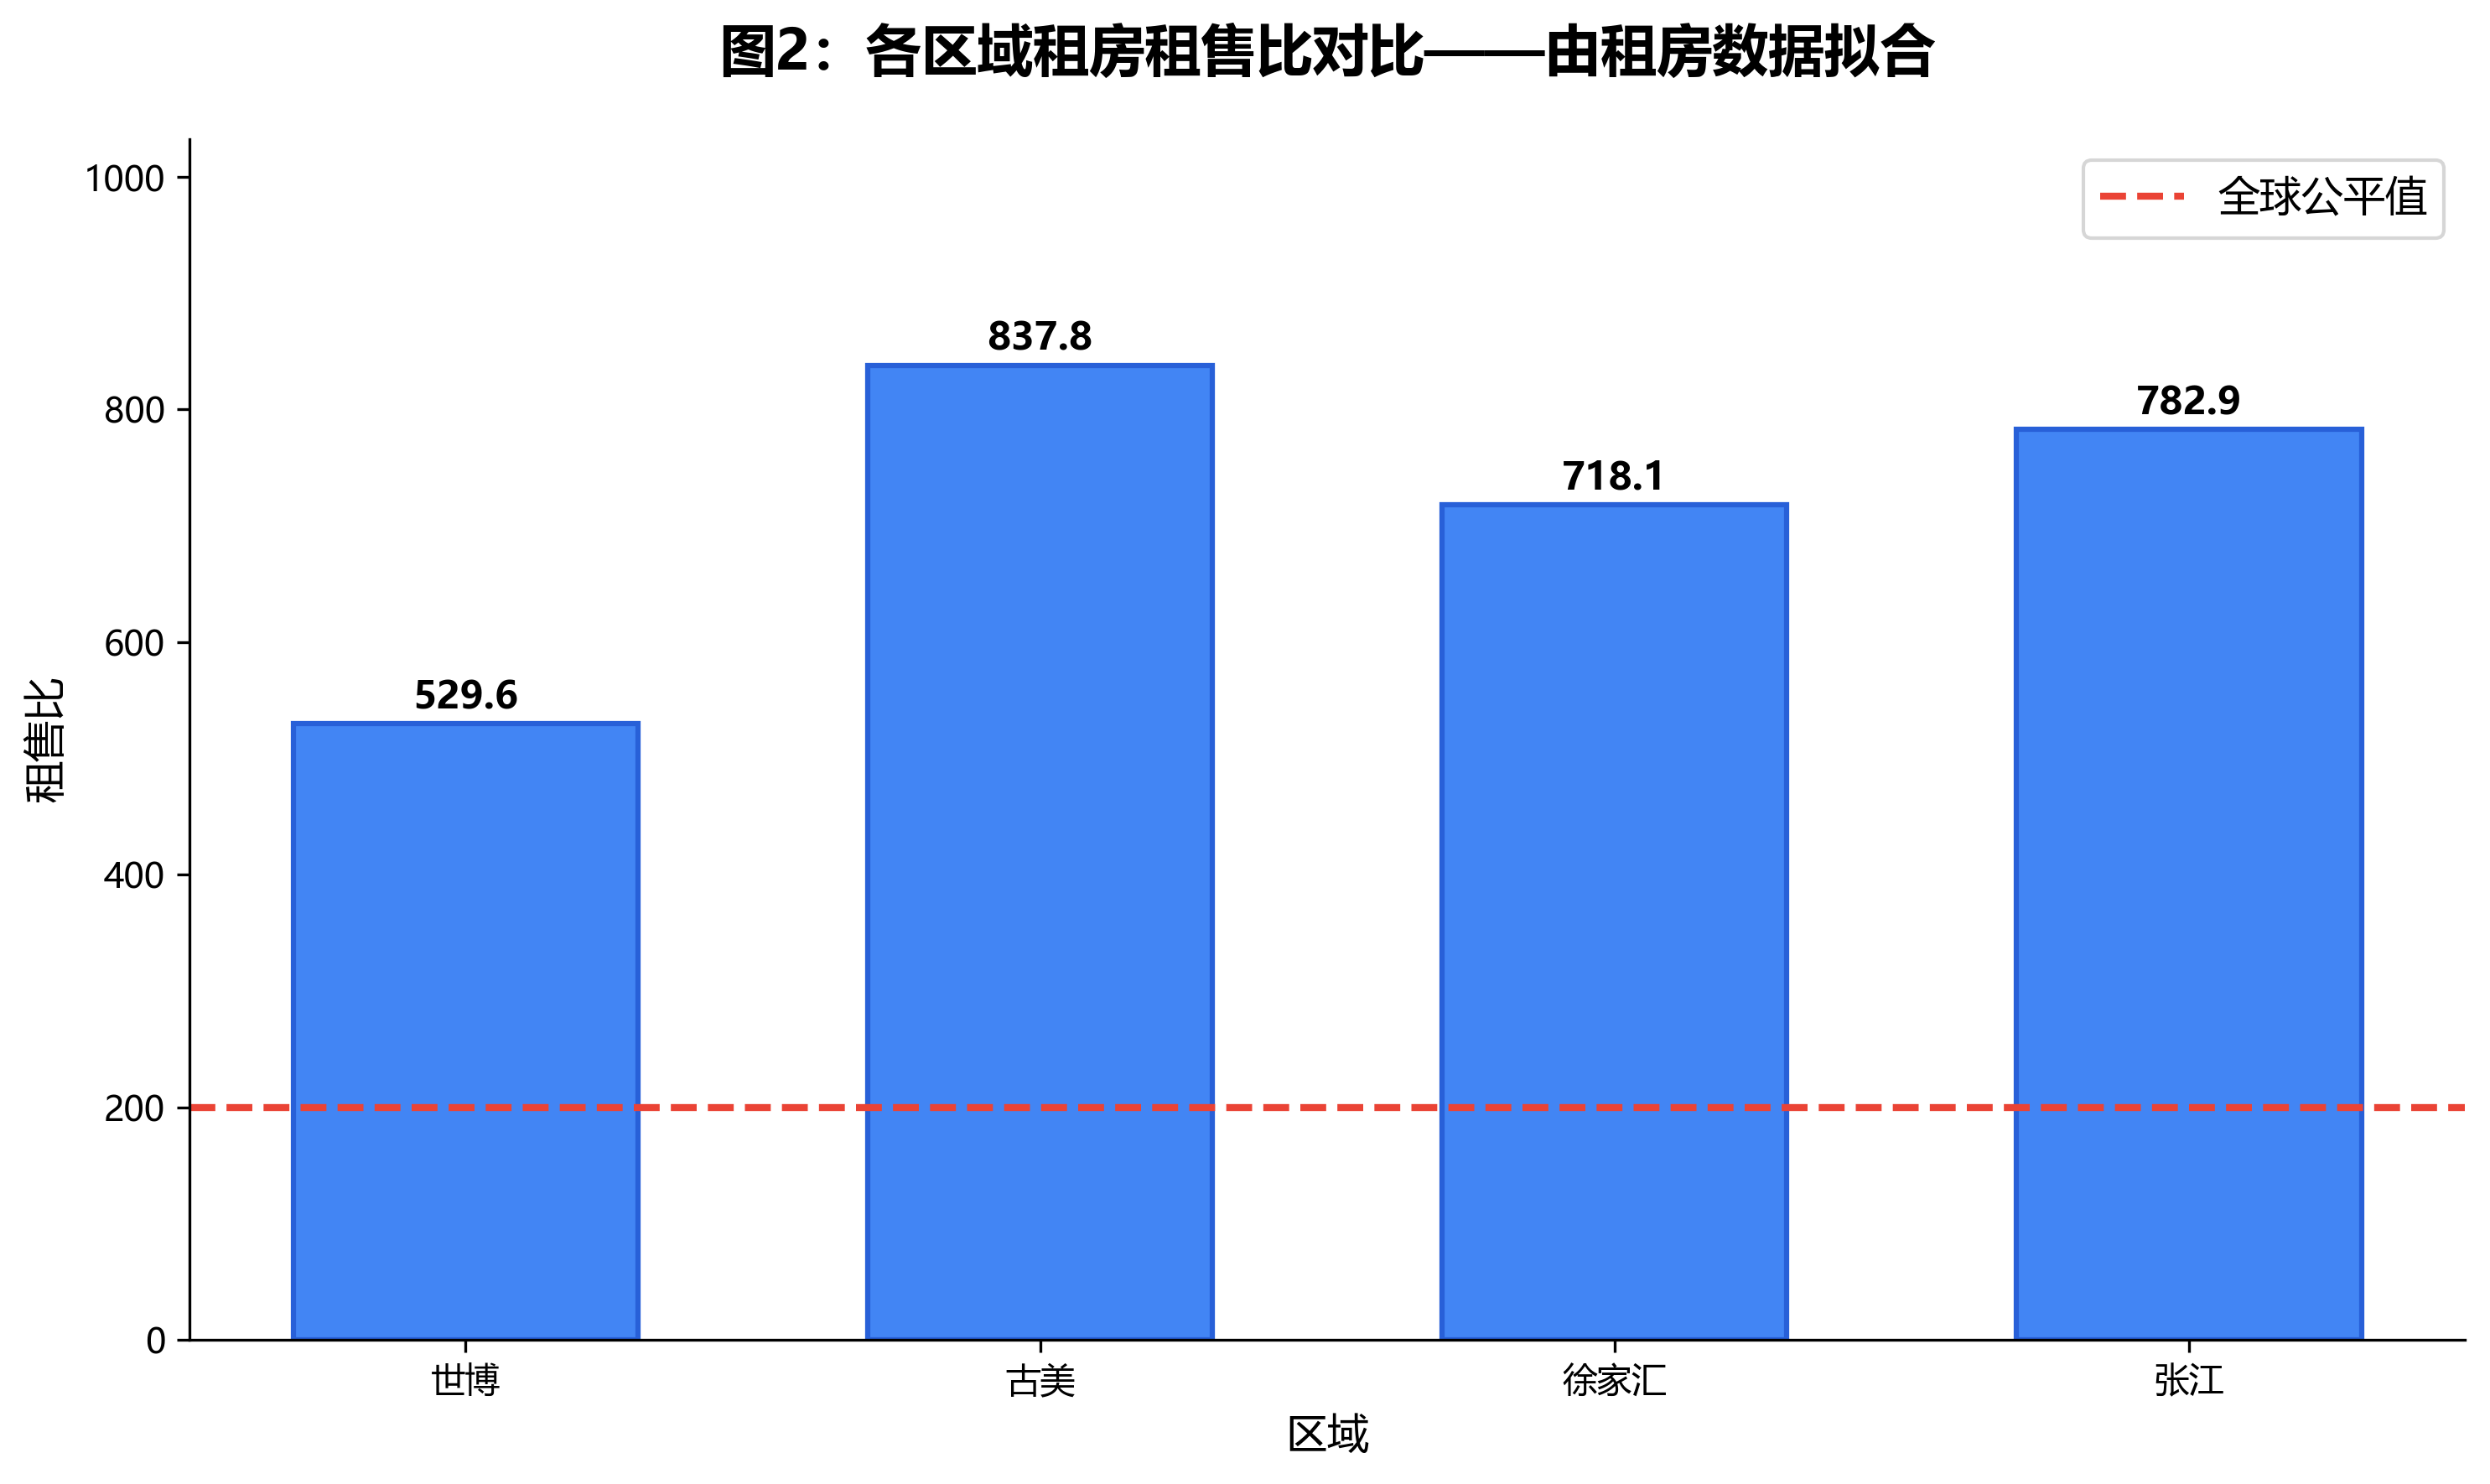

In [15]:
# 为出租房估计房价
intercept_esf = ols_esf_result.params['Intercept']
location_esf_gumei = ols_esf_result.params['路段_古美[T.True]']
location_esf_xujiahui = ols_esf_result.params['路段_徐家汇[T.True]']
location_esf_zhangjiang = ols_esf_result.params['路段_张江[T.True]']
area_esf = ols_esf_result.params['面积']

esf_shibo_predict = pd.DataFrame((df_zu_shibo_cleaned['面积']*area_esf + intercept_esf))

esf_gumei_predict = pd.DataFrame((df_zu_gumei_cleaned['面积']*area_esf + location_esf_gumei + intercept_esf))

esf_xujiahui_predict = pd.DataFrame((df_zu_xujiahui_cleaned['面积']*area_esf + location_esf_xujiahui + intercept_esf))

esf_zhangjiang_predict = pd.DataFrame((df_zu_xujiahui_cleaned['面积']*area_esf + location_esf_zhangjiang + intercept_esf))

# 利用租房数据得到的每个区域每平方米 median price to rent ratio
zu_shibo_ptr = (esf_shibo_predict['面积'] / df_zu_shibo_cleaned['每平方米租金']).median()
zu_gumei_ptr = (esf_gumei_predict['面积'] / df_zu_gumei_cleaned['每平方米租金']).median()
zu_zhangjiang_ptr = (esf_zhangjiang_predict['面积'] / df_zu_zhangjiang_cleaned['每平方米租金']).median()
zu_xujiahui_ptr = (esf_xujiahui_predict['面积'] / df_zu_xujiahui_cleaned['每平方米租金']).median()

price_to_rent_ptr = [zu_shibo_ptr,zu_gumei_ptr,zu_xujiahui_ptr,zu_zhangjiang_ptr]

# 画图
plt.figure(figsize=(10, 6), dpi=300)
areas = ["世博", "古美", "徐家汇", "张江"]

bars = plt.bar(
    x=areas, 
    height=price_to_rent_ptr,
    color="#4285F4",  # 柱子颜色
    width=0.6,  # 柱子宽度
    edgecolor="#2860D8",  # 柱子边框色
    linewidth=1.5  # 边框粗细
)

for bar in bars:
    bar_height = bar.get_height()
    # 在柱子顶部中央添加数值标签
    plt.text(
        x=bar.get_x() + bar.get_width()/2,  # x坐标
        y=bar_height + 5,  # 在柱子顶部+5位置上
        s=f"{bar_height:.1f}",  # 保留一位小数
        ha="center",  # 居中对齐
        va="bottom",  # 底部对齐
        fontsize=11,  # 数值字体大小
        fontweight="bold"  # 数值加粗
    )

plt.axhline(
    y=200,  # 参考线的y轴值
    color="#EA4335",  # 参考线颜色
    linestyle="--",  # 线型
    linewidth=2,  # 线宽
    label="全球公平值"  # 参考线标签
)

# 设置标题、标签和图例
plt.title("图2：各区域租房租售比对比——由租房数据拟合", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("租售比", fontsize=12, fontweight="500")
plt.xlabel("区域", fontsize=12, fontweight="500")
plt.legend(loc="upper right", fontsize=12)

# 隐藏上、右坐标轴的边框
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围
max_value = max(price_to_rent)
plt.ylim(0, max_value * 1.15)

# 调整布局
plt.tight_layout()

plt.show()


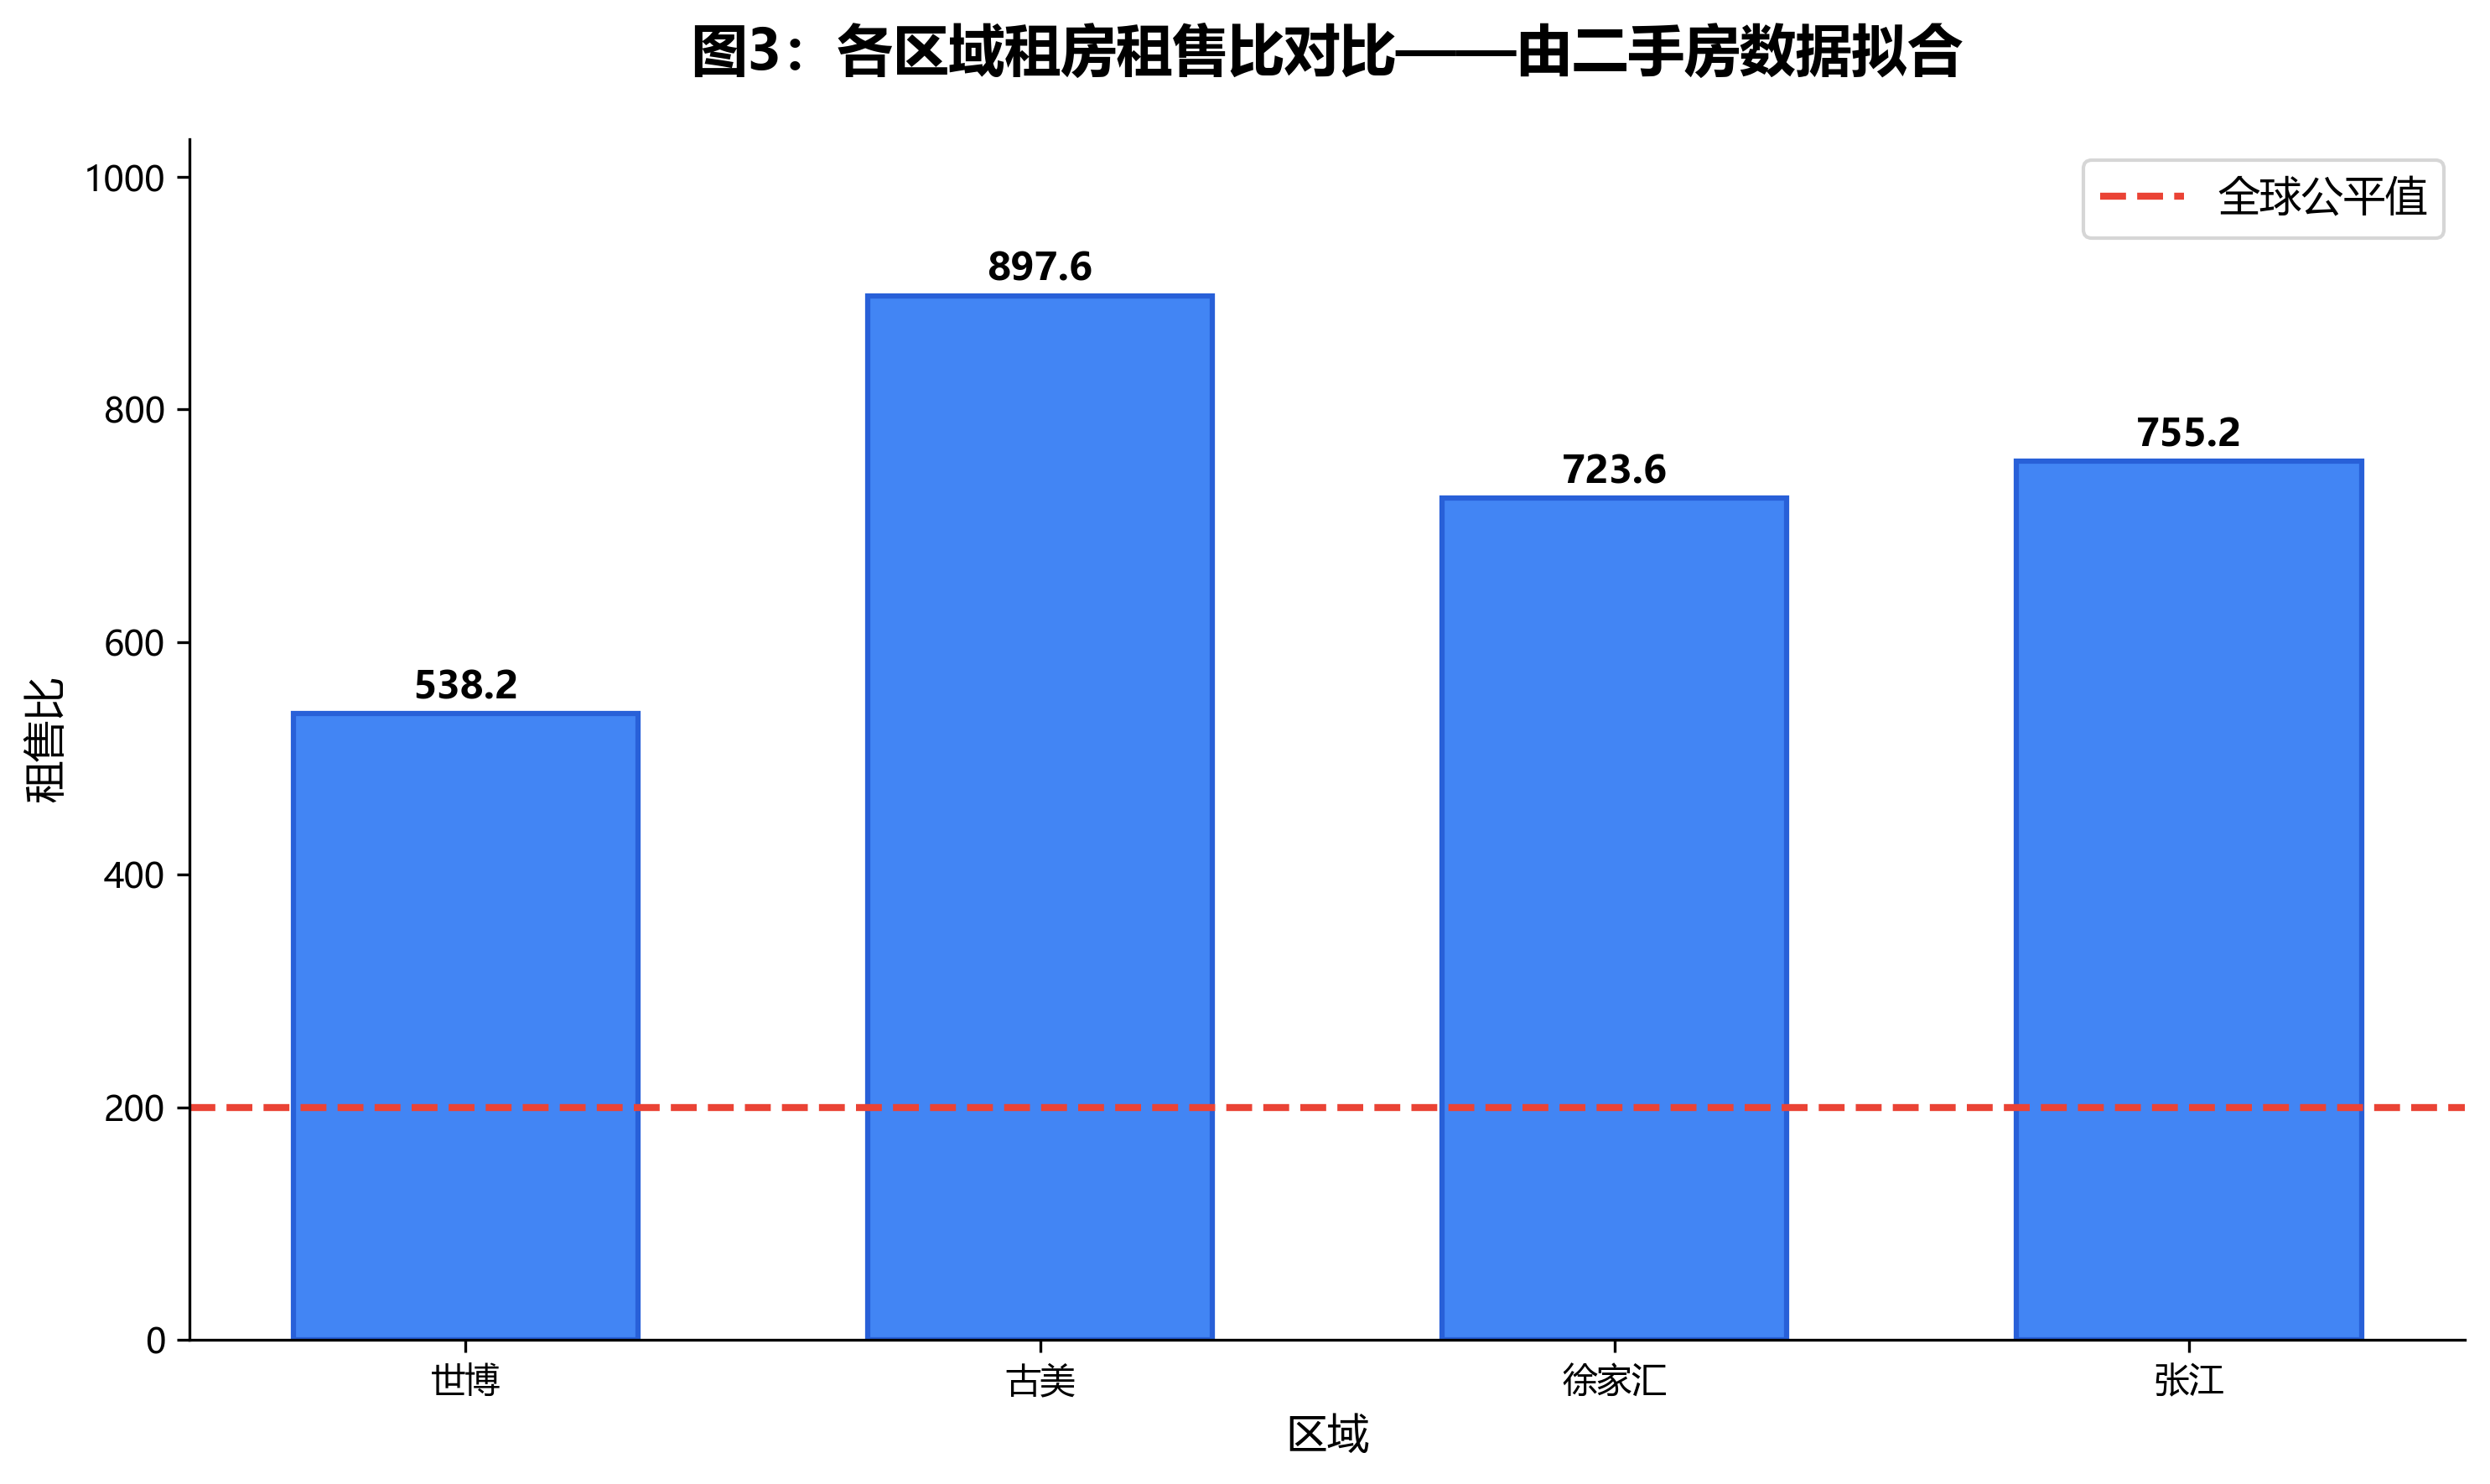

In [16]:
# 为二手房估计租金
intercept_zu = ols_zu_result.params['Intercept']
location_zu_gumei = ols_zu_result.params['二级地址_古美[T.True]']
location_zu_xujiahui = ols_zu_result.params['二级地址_徐家汇[T.True]']
location_zu_zhangjiang = ols_zu_result.params['二级地址_张江[T.True]']
area_zu = ols_zu_result.params['面积']

zu_shibo_predict = pd.DataFrame((df_esf_shibo['面积']*area_zu + intercept_zu))

zu_gumei_predict = pd.DataFrame((df_esf_gumei['面积']*area_zu + location_zu_gumei + intercept_zu))

zu_xujiahui_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_xujiahui + intercept_zu))

zu_zhangjiang_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_zhangjiang + intercept_zu))

# 利用二手房数据得到的每个区域每平方米 median price to rent ratio
esf_shibo_ptr = (df_esf_shibo_cleaned['每平方米价格']/zu_shibo_predict['面积']).median()
esf_gumei_ptr = (df_esf_gumei_cleaned['每平方米价格']/zu_gumei_predict['面积']).median()
esf_xujiahui_ptr = (df_esf_xujiahui_cleaned['每平方米价格']/zu_xujiahui_predict['面积']).median()
esf_zhangjiang_ptr = (df_esf_zhangjiang_cleaned['每平方米价格']/zu_zhangjiang_predict['面积']).median()

price_to_rent_ptr = [esf_shibo_ptr,esf_gumei_ptr,esf_xujiahui_ptr,esf_zhangjiang_ptr]

# 画图
plt.figure(figsize=(10, 6), dpi=300)
areas = ["世博", "古美", "徐家汇", "张江"]

bars = plt.bar(
    x=areas, 
    height=price_to_rent_ptr,
    color="#4285F4",  # 柱子颜色
    width=0.6,  # 柱子宽度
    edgecolor="#2860D8",  # 柱子边框色
    linewidth=1.5  # 边框粗细
)

for bar in bars:
    bar_height = bar.get_height()
    # 在柱子顶部中央添加数值标签
    plt.text(
        x=bar.get_x() + bar.get_width()/2,  # x坐标
        y=bar_height + 5,  # 在柱子顶部+5位置上
        s=f"{bar_height:.1f}",  # 保留一位小数
        ha="center",  # 居中对齐
        va="bottom",  # 底部对齐
        fontsize=11,  # 数值字体大小
        fontweight="bold"  # 数值加粗
    )

plt.axhline(
    y=200,  # 参考线的y轴值
    color="#EA4335",  # 参考线颜色
    linestyle="--",  # 线型
    linewidth=2,  # 线宽
    label="全球公平值"  # 参考线标签
)

# 设置标题、标签和图例
plt.title("图3：各区域租房租售比对比——由二手房数据拟合", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("租售比", fontsize=12, fontweight="500")
plt.xlabel("区域", fontsize=12, fontweight="500")
plt.legend(loc="upper right", fontsize=12)

# 隐藏上、右坐标轴的边框
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围
max_value = max(price_to_rent)
plt.ylim(0, max_value * 1.15)

# 调整布局
plt.tight_layout()

plt.show()

3.5 Data Science Modeling Pro Max

In [17]:
#拟合带有二次项和交互项的ols回归
def ols_regression_with_terms(df, dependent_var, continuous_var, categorical_var):
    
    # 创建连续变量平方项
    df_extended = df.copy()
    df_extended[f'{continuous_var}_sq'] = df_extended[continuous_var] **2
    
    # 对分类变量独热编码
    df_encoded = pd.get_dummies(df_extended, columns=[categorical_var], drop_first=True)
    encoded_cat_vars = [col for col in df_encoded.columns if col.startswith(categorical_var)]
    
    # 构建基础项
    base_terms = [continuous_var, f'{continuous_var}_sq'] + encoded_cat_vars
    
    # 构建交互项
    interaction_terms = [f'{continuous_var}:{cat_var}' for cat_var in encoded_cat_vars]
    
    # 组合所有项构建公式
    all_terms = base_terms + interaction_terms
    formula = f"{dependent_var} ~ " + " + ".join(all_terms)
    
    # 执行OLS回归
    model = ols(formula, data=df_encoded).fit()
    
    return model

In [18]:
# 二手房数据的ols回归
dependent_var = '每平方米价格'
independent_vars = ['面积','路段']

ols_esf_result_plus = ols_regression_with_terms(df_esf_cleaned,'每平方米价格','面积','路段')
ols_esf_result_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米价格   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     325.6
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:07:39   Log-Likelihood:                -44896.
No. Observations:                3984   AIC:                         8.981e+04
Df Residuals:                    3975   BIC:                         8.987e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.246e+04   1939.827     16.732      0.000    2.87e+04    3.63e+04
路段_古美[T.True]      1.653e+04   3039.236      5.440      0.000    1.06e+04    2.25e+04
路段_张江[T.True]     -3140.5765   2566.694     -1.224      0.221   -8172.737    1891.584
路段_徐家汇[T.True]     4.381e+04   2090.350     20.958      0.000    3.97e+04    4.79e+04
面积                  366.0028     39.568      9.250      0.000     288.426     443.579
面积:路段_古美[T.True]   -122.6632     29.713     -4.128      0.000    -180.918     -64.408
面积:路段_张江[T.True]    -27.5949     25.719     -1.073      0.283     -78.019      22.829
面积:路段_徐家汇[T.True]  -216.7199     21.168    -10.238      0.000    -258.220    -175.220
面积_sq                -0.2144      0.198     -1.083      0.279      -0.602       0.174
==============================================================================
Omnibus:                      716.885   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.879
Skew:                           1.052   Prob(JB):                         0.00
Kurtosis:                       5.181   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# 租房数据的ols回归
ols_zu_result_plus = ols_regression_with_terms(df_zu_cleaned,'每平方米租金','面积','二级地址')
ols_zu_result_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米租金   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     597.1
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:07:41   Log-Likelihood:                -17256.
No. Observations:                3919   AIC:                         3.453e+04
Df Residuals:                    3910   BIC:                         3.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             147.1142      1.929     76.258      0.000     143.332     150.896
二级地址_古美[T.True]       -58.8268      2.364    -24.888      0.000     -63.461     -54.193
二级地址_张江[T.True]       -44.2013      1.871    -23.627      0.000     -47.869     -40.534
二级地址_徐家汇[T.True]       34.3683      2.284     15.050      0.000      29.891      38.846
面积                     -1.2033      0.048    -24.859      0.000      -1.298      -1.108
面积:二级地址_古美[T.True]      0.5680      0.037     15.407      0.000       0.496       0.640
面积:二级地址_张江[T.True]      0.2449      0.033      7.465      0.000       0.181       0.309
面积:二级地址_徐家汇[T.True]    -0.0639      0.034     -1.866      0.062      -0.131       0.003
面积_sq                   0.0055      0.000     19.807      0.000       0.005       0.006
==============================================================================
Omnibus:                      223.374   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.909
Skew:                           0.059   Prob(JB):                    3.53e-199
Kurtosis:                       5.363   Cond. No.                     9.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

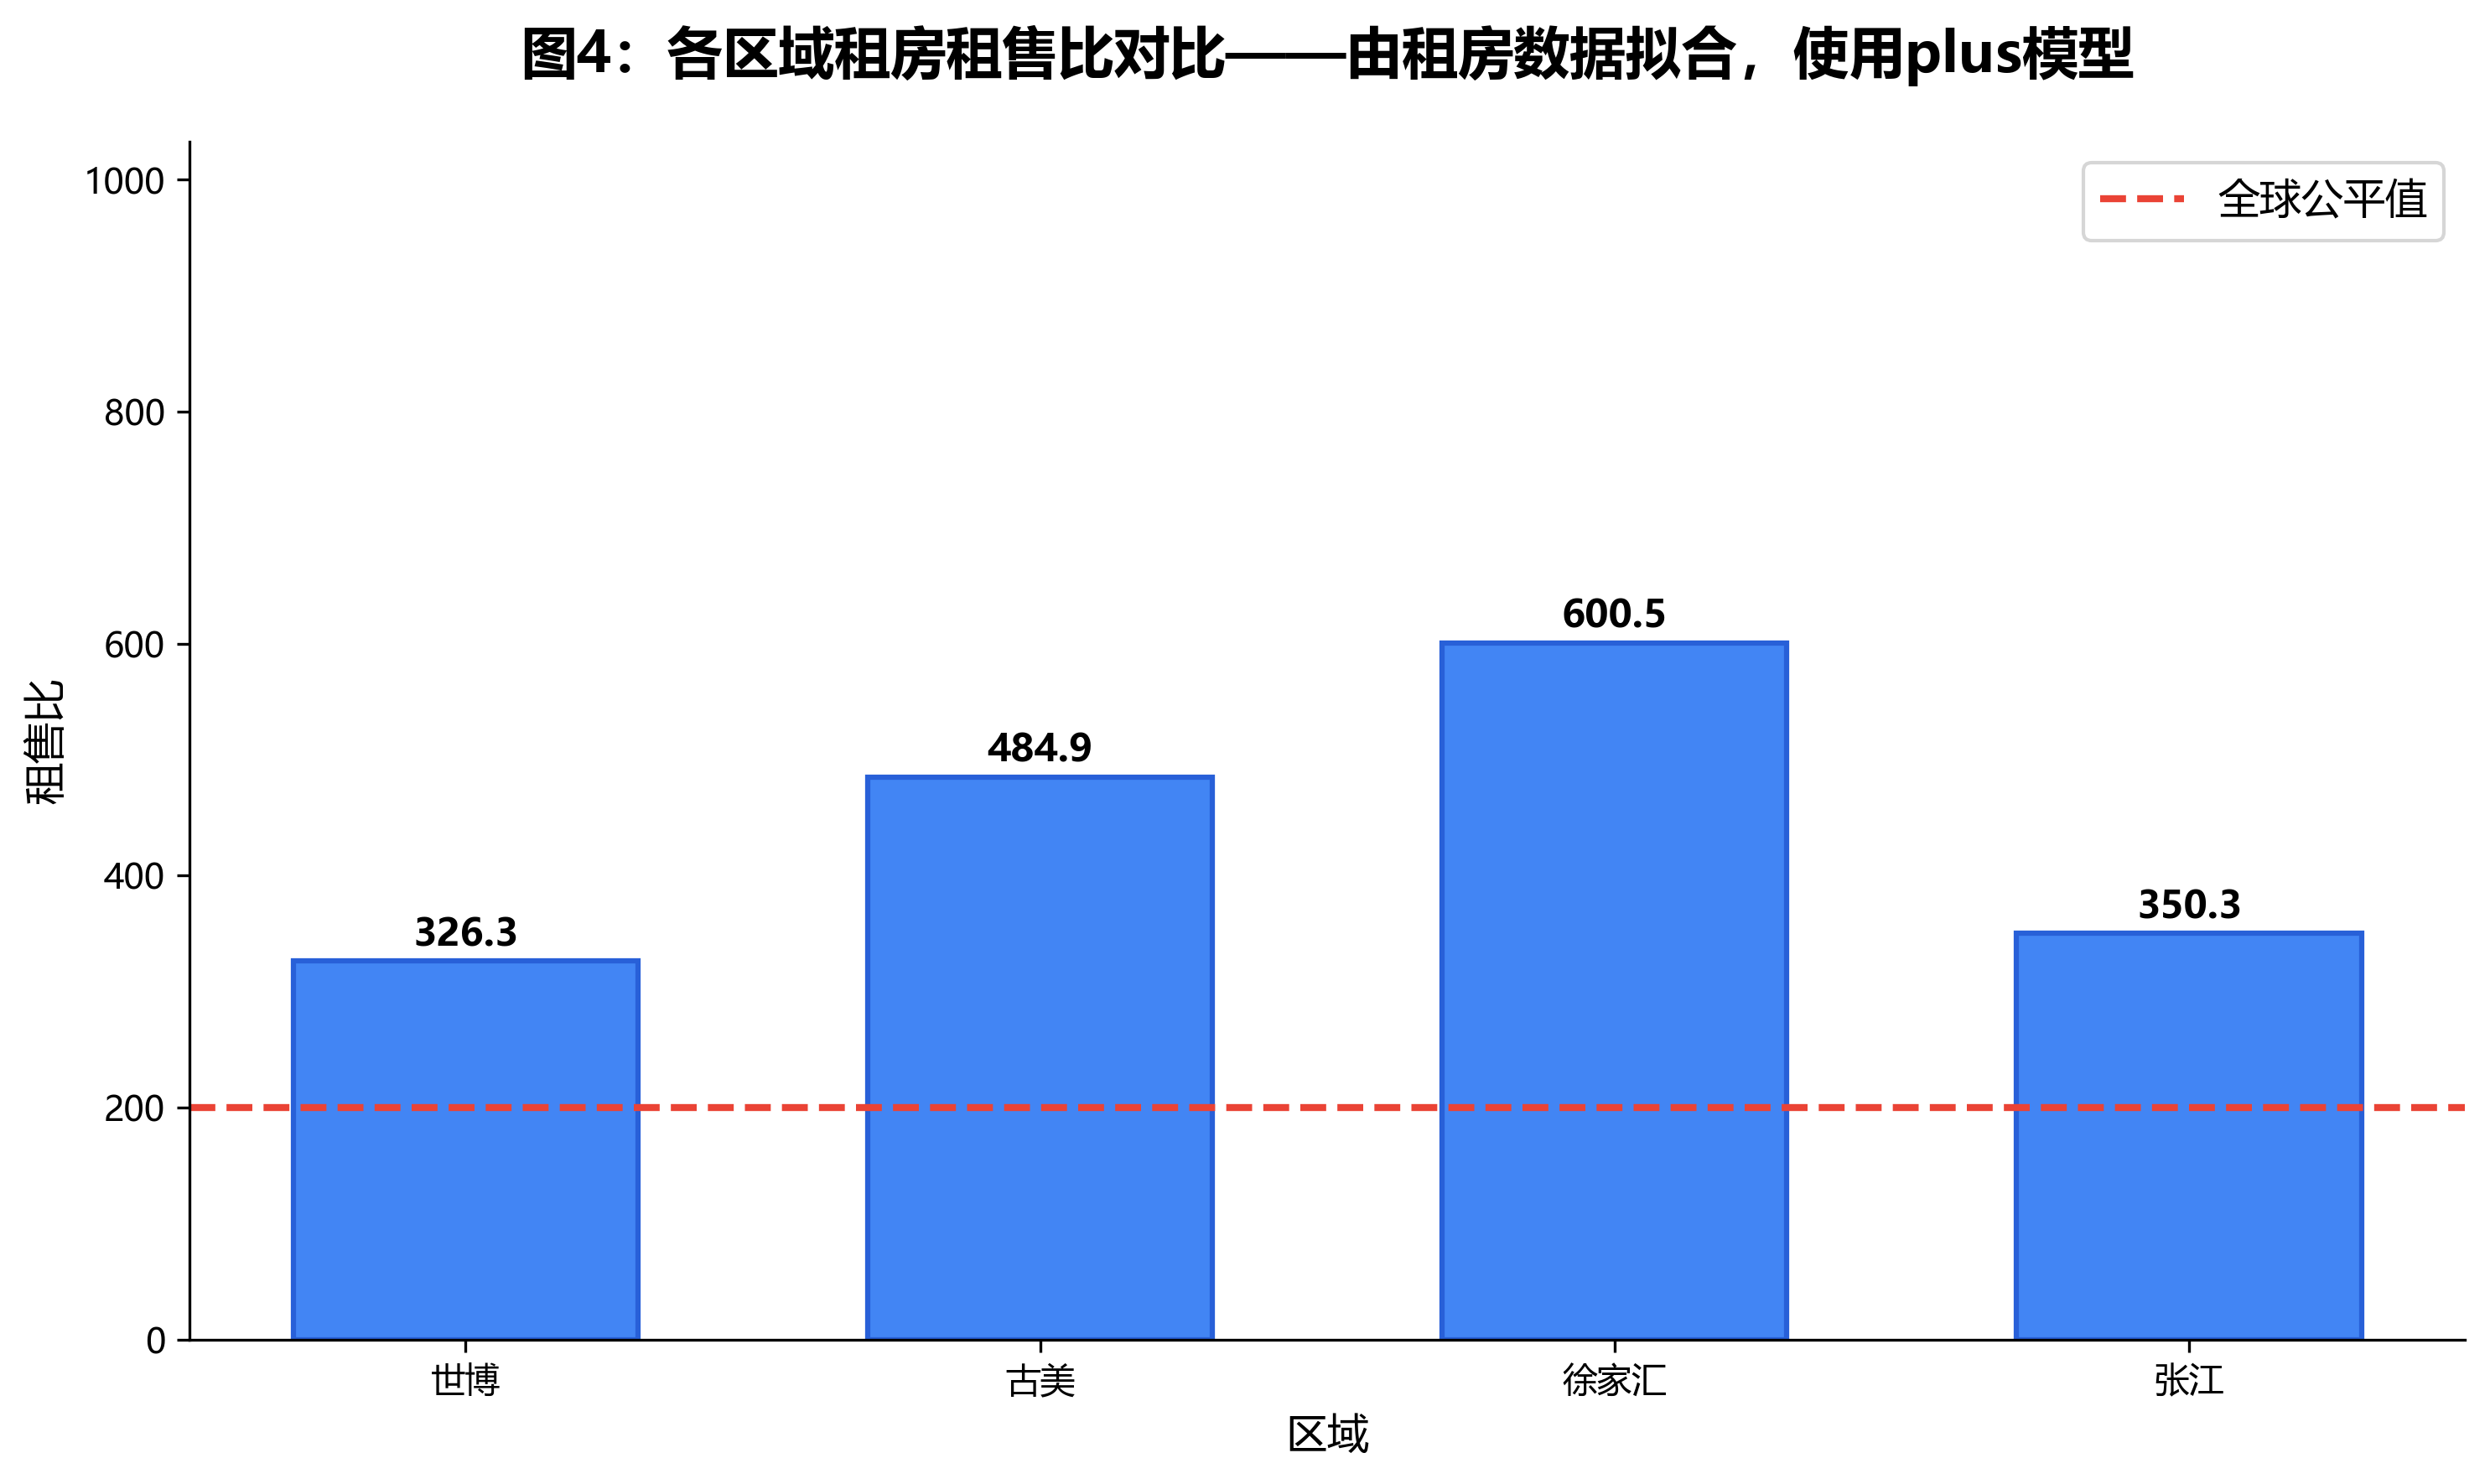

In [20]:
# 为出租房估计房价，利用plus模型
intercept_esf = ols_esf_result_plus.params['路段_古美[T.True]']
location_esf_xujiahui = ols_esf_result_plus.params['路段_徐家汇[T.True]']
location_esf_zhangjiang = ols_esf_result_plus.params['路段_张江[T.True]']
area_esf = ols_esf_result_plus.params['面积']
cross_esf_gumei = ols_esf_result_plus.params['面积:路段_古美[T.True]']
cross_esf_xujiahui = ols_esf_result_plus.params['面积:路段_徐家汇[T.True]']
cross_esf_zhangjiang = ols_esf_result_plus.params['面积:路段_张江[T.True]']
area_sqare = ols_esf_result_plus.params['面积_sq']

esf_shibo_predict = pd.DataFrame((df_zu_shibo['面积']*area_esf + df_zu_shibo['面积']*df_zu_shibo['面积']*area_sqare + intercept_esf))

esf_gumei_predict = pd.DataFrame((df_zu_gumei['面积']*area_esf + location_esf_gumei + df_zu_gumei['面积']*cross_esf_gumei + df_zu_gumei['面积']*df_zu_gumei['面积']*area_sqare + intercept_esf))

esf_xujiahui_predict = pd.DataFrame((df_zu_xujiahui['面积']*area_esf + location_esf_xujiahui + df_zu_xujiahui['面积']*cross_esf_xujiahui + df_zu_xujiahui['面积']*df_zu_xujiahui['面积']*area_sqare + intercept_esf))

esf_zhangjiang_predict = pd.DataFrame((df_zu_zhangjiang['面积']*area_esf + location_esf_zhangjiang + df_zu_zhangjiang['面积']*cross_esf_zhangjiang + df_zu_zhangjiang['面积']*df_zu_zhangjiang['面积']*area_sqare + intercept_esf))

# 利用租房数据得到的每个区域每平方米 median price to rent ratio
zu_shibo_ptr = (esf_shibo_predict['面积'] / df_zu_shibo_cleaned['每平方米租金']).median()
zu_gumei_ptr = (esf_gumei_predict['面积'] / df_zu_gumei_cleaned['每平方米租金']).median()
zu_zhangjiang_ptr = (esf_zhangjiang_predict['面积'] / df_zu_zhangjiang_cleaned['每平方米租金']).median()
zu_xujiahui_ptr = (esf_xujiahui_predict['面积'] / df_zu_xujiahui_cleaned['每平方米租金']).median()

price_to_rent_ptr = [zu_shibo_ptr,zu_gumei_ptr,zu_xujiahui_ptr,zu_zhangjiang_ptr]

# 画图
plt.figure(figsize=(10, 6), dpi=300)
areas = ["世博", "古美", "徐家汇", "张江"]

bars = plt.bar(
    x=areas, 
    height=price_to_rent_ptr,
    color="#4285F4",  # 柱子颜色
    width=0.6,  # 柱子宽度
    edgecolor="#2860D8",  # 柱子边框色
    linewidth=1.5  # 边框粗细
)

for bar in bars:
    bar_height = bar.get_height()
    # 在柱子顶部中央添加数值标签
    plt.text(
        x=bar.get_x() + bar.get_width()/2,  # x坐标
        y=bar_height + 5,  # 在柱子顶部+5位置上
        s=f"{bar_height:.1f}",  # 保留一位小数
        ha="center",  # 居中对齐
        va="bottom",  # 底部对齐
        fontsize=11,  # 数值字体大小
        fontweight="bold"  # 数值加粗
    )

plt.axhline(
    y=200,  # 参考线的y轴值
    color="#EA4335",  # 参考线颜色
    linestyle="--",  # 线型
    linewidth=2,  # 线宽
    label="全球公平值"  # 参考线标签
)

# 设置标题、标签和图例
plt.title("图4：各区域租房租售比对比——由租房数据拟合，使用plus模型", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("租售比", fontsize=12, fontweight="500")
plt.xlabel("区域", fontsize=12, fontweight="500")
plt.legend(loc="upper right", fontsize=12)

# 隐藏上、右坐标轴的边框
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围
max_value = max(price_to_rent)
plt.ylim(0, max_value * 1.15)

# 调整布局
plt.tight_layout()

plt.show()

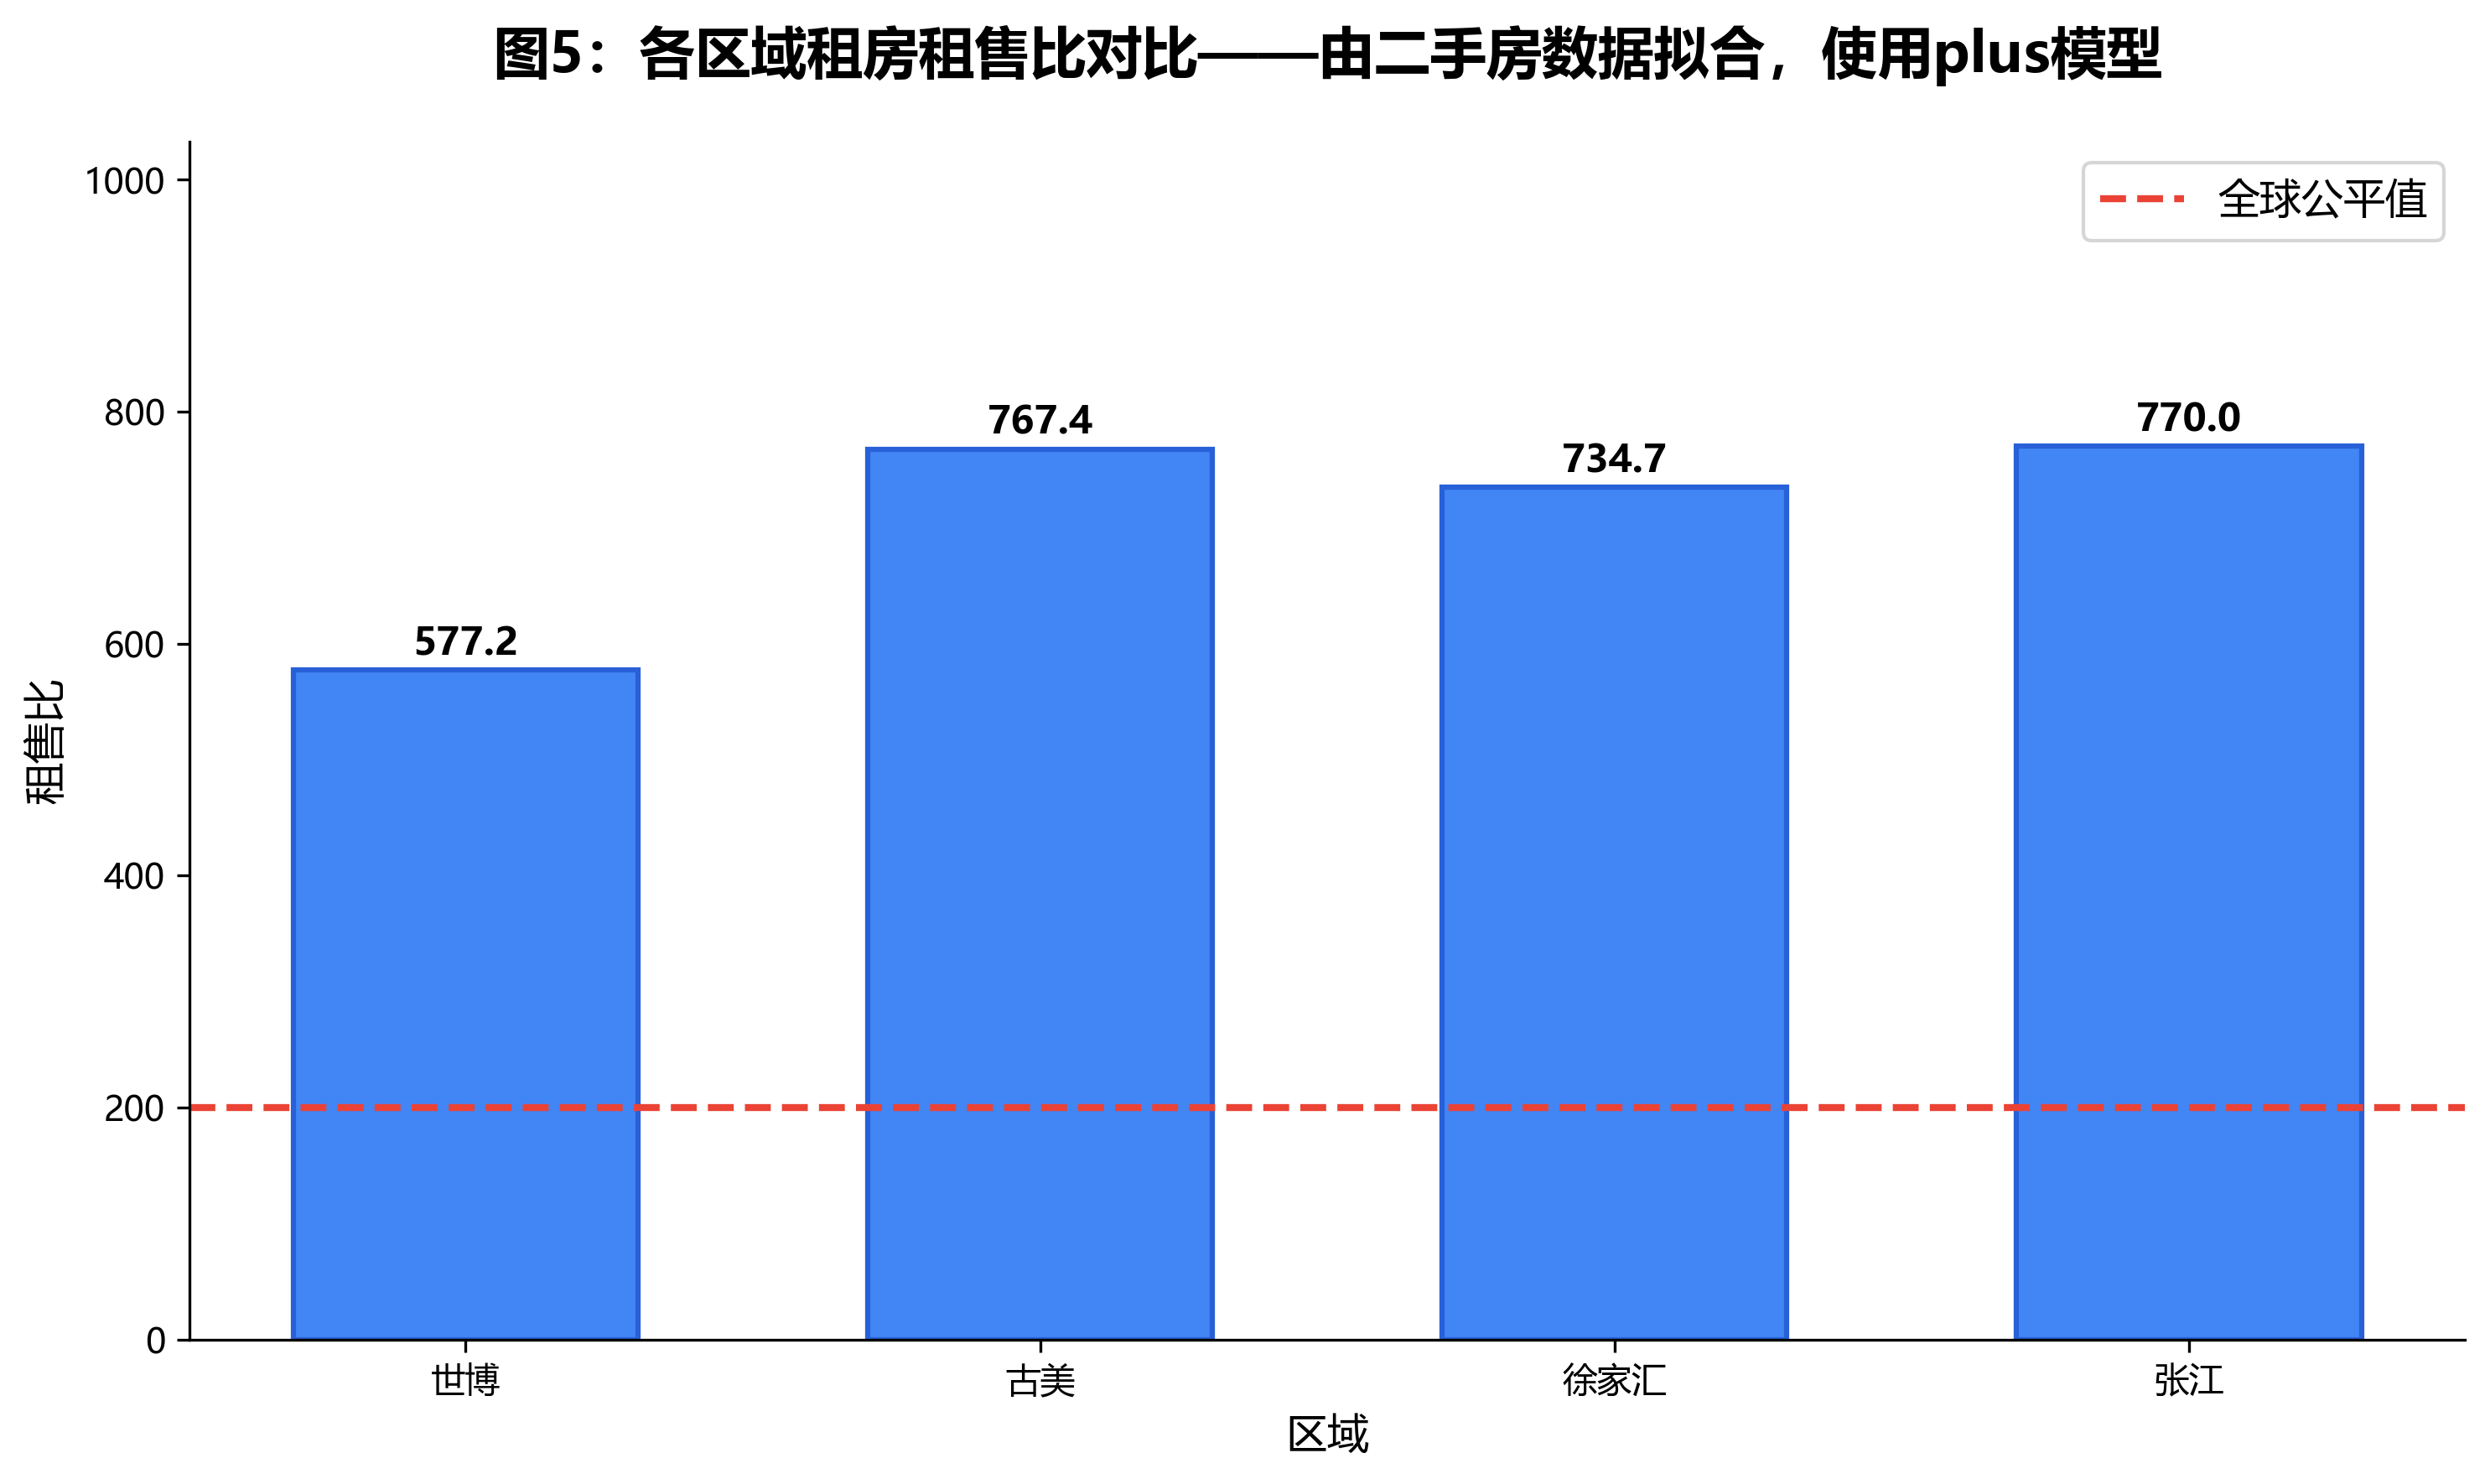

In [21]:
# 为二手房估计租价，利用plus模型
intercept_zu = ols_zu_result_plus.params['Intercept']
location_zu_gumei = ols_zu_result_plus.params['二级地址_古美[T.True]']
location_zu_xujiahui = ols_zu_result_plus.params['二级地址_徐家汇[T.True]']
location_zu_zhangjiang = ols_zu_result_plus.params['二级地址_张江[T.True]']
area_zu = ols_zu_result_plus.params['面积']
cross_zu_gumei = ols_zu_result_plus.params['面积:二级地址_古美[T.True]']
cross_zu_xujiahui = ols_zu_result_plus.params['面积:二级地址_徐家汇[T.True]']
cross_zu_zhangjiang = ols_zu_result_plus.params['面积:二级地址_张江[T.True]']
area_sqare = ols_zu_result_plus.params['面积_sq']


zu_shibo_predict = pd.DataFrame((df_esf_shibo['面积']*area_zu + df_esf_shibo['面积']*df_esf_shibo['面积']*area_sqare + intercept_zu))

zu_gumei_predict = pd.DataFrame((df_esf_gumei['面积']*area_zu + location_zu_gumei + df_esf_gumei['面积']*cross_zu_gumei + df_esf_gumei['面积']*df_esf_gumei['面积']*area_sqare + intercept_zu))

zu_xujiahui_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_xujiahui + df_esf_xujiahui['面积']*cross_zu_xujiahui + df_esf_xujiahui['面积']*df_esf_xujiahui['面积']*area_sqare + intercept_zu))

zu_zhangjiang_predict = pd.DataFrame((df_esf_zhangjiang['面积']*area_zu + location_zu_zhangjiang + df_esf_zhangjiang['面积']*cross_zu_zhangjiang + df_esf_zhangjiang['面积']*df_esf_zhangjiang['面积']*area_sqare + intercept_zu))

# 利用二手房数据得到的每个区域每平方米 median price to rent ratio
esf_shibo_ptr = (df_esf_shibo_cleaned['每平方米价格']/zu_shibo_predict['面积']).median()
esf_gumei_ptr = (df_esf_gumei_cleaned['每平方米价格']/zu_gumei_predict['面积']).median()
esf_xujiahui_ptr = (df_esf_xujiahui_cleaned['每平方米价格']/zu_xujiahui_predict['面积']).median()
esf_zhangjiang_ptr = (df_esf_zhangjiang_cleaned['每平方米价格']/zu_zhangjiang_predict['面积']).median()

price_to_rent_ptr = [esf_shibo_ptr,esf_gumei_ptr,esf_xujiahui_ptr,esf_zhangjiang_ptr]

# 画图
plt.figure(figsize=(10, 6), dpi=300)
areas = ["世博", "古美", "徐家汇", "张江"]

bars = plt.bar(
    x=areas, 
    height=price_to_rent_ptr,
    color="#4285F4",  # 柱子颜色
    width=0.6,  # 柱子宽度
    edgecolor="#2860D8",  # 柱子边框色
    linewidth=1.5  # 边框粗细
)

for bar in bars:
    bar_height = bar.get_height()
    # 在柱子顶部中央添加数值标签
    plt.text(
        x=bar.get_x() + bar.get_width()/2,  # x坐标
        y=bar_height + 5,  # 在柱子顶部+5位置上
        s=f"{bar_height:.1f}",  # 保留一位小数
        ha="center",  # 居中对齐
        va="bottom",  # 底部对齐
        fontsize=11,  # 数值字体大小
        fontweight="bold"  # 数值加粗
    )

plt.axhline(
    y=200,  # 参考线的y轴值
    color="#EA4335",  # 参考线颜色
    linestyle="--",  # 线型
    linewidth=2,  # 线宽
    label="全球公平值"  # 参考线标签
)

# 设置标题、标签和图例
plt.title("图5：各区域租房租售比对比——由二手房数据拟合，使用plus模型", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("租售比", fontsize=12, fontweight="500")
plt.xlabel("区域", fontsize=12, fontweight="500")
plt.legend(loc="upper right", fontsize=12)

# 隐藏上、右坐标轴的边框
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围
max_value = max(price_to_rent)
plt.ylim(0, max_value * 1.15)

# 调整布局
plt.tight_layout()

plt.show()

利用租房数据估计其房价，并利用该组数据计算出的 median price to rent ratio 最可信（即图4所示结果），因为该组结果最接近global fair value，而其他方法计算的结果与该值偏离过大。